## Assignment A [25 marks]
  The NHS has been challenged to make “efficiency savings” and you have been commissioned by an NHS executive to review, document and assess GP prescribing costs. Using data from the HSCIC GP Practice Prescribing dataset for your assigned city only, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:

In [2]:
import sys
!{sys.executable} -m pip install pandasql
import pandas as pd 
import numpy as np
from pandasql import PandaSQL 
import matplotlib.pyplot as plt
import math
# improt all function. 

#### 1. Identify all GP practices and produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column).

In [3]:
#Loading practice name
colsName=['period','practiceCode','practiceName','center','street','town','district','postcode']

#Read the practice data online and strip the column name
#PracticeData = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv',header=None,index_col=False,names=colsName)
PPlace='https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'
chunks=pd.read_csv(PPlace,chunksize=10000,header=None,index_col=False,names=colsName)
PracticeData=pd.concat(chunk for chunk in chunks)
PracticeData.columns = map(str.strip, PracticeData.columns)
PracticeData.head()

,period,practiceCode,practiceName,center,street,town,district,postcode
0,201512,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,201512,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,201512,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,201512,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ


In [4]:
#Examine the dataset 
PracticeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9906 entries, 0 to 9905
Data columns (total 8 columns):
period          9906 non-null int64
practiceCode    9906 non-null object
practiceName    9906 non-null object
center          9906 non-null object
street          9906 non-null object
town            9906 non-null object
district        9906 non-null object
postcode        9906 non-null object
dtypes: int64(1), object(7)
memory usage: 696.5+ KB


In [5]:
#Choosing from town column 
ManListTown=PracticeData['town'].str.contains('manchester', case=False)
ManTown=PracticeData[ManListTown]
ManTown.head()

,period,practiceCode,practiceName,center,street,town,district,postcode
6329,201512,P83025,ST GABRIEL'S MEDICAL CENTRE,ST.GABRIELS MEDICAL CTR.,4 BISHOPS ROAD PRESTWICH,MANCHESTER,,M25 0HT
6332,201512,P83029,SPRING LANE SURGERY,SPRING LANE SURGERY,15-17 SPRING LN RADCLIFFE,MANCHESTER,,M26 2TQ
6335,201512,P83608,THE ELMS MEDICAL CENTRE,THE ELMS MEDICAL CENTRE,GREEN LANE WHITEFIELD,MANCHESTER,,M45 7FD
6341,201512,P84004,FIVE OAKS FAMILIY PRACTICE,FIVE OAKS FAMILY PRACTICE,47 GRAHAM STREET BESWICK,MANCHESTER,,M11 3BB
6342,201512,P84005,THE VALLANCE CENTRE,THE VALLANCE CENTRE,BRUNSWICK STREET,MANCHESTER,,M13 9UJ


In [6]:
#Checking for Manchester in town column
ManTown.town.value_counts(dropna=False)

MANCHESTER                   117
HULME  MANCHESTER              1
NEW MOSTON  MANCHESTER         1
WHALLEY RANGE  MANCHESTER      1
TYLDESLEY NR. MANCHESTER       1
GODMANCHESTER  HUNTINGDON      1
NEWTON HEATH MANCHESTER        1
BESWICK MANCHESTER             1
GREATER MANCHESTER             1
MOSS SIDE H/C  MANCHESTER      1
Name: town, dtype: int64

In [7]:
#Choosing Manchester from distirct
ManListDistrict=PracticeData['district'].str.contains('manchester', case=False)
ManDistrict=PracticeData[ManListDistrict]
ManDistrict.head(5)

,period,practiceCode,practiceName,center,street,town,district,postcode
6312,201512,P83001,FAIRFAX GROUP PRACTICE,PRESTWICH HEALTH CENTRE,FAIRFAX ROAD,PRESTWICH,MANCHESTER,M25 1BT
6313,201512,P83004,THE UPLANDS MEDICAL PRACTICE,WHITEFIELD HEALTH CENTRE,BURY NEW ROAD,WHITEFIELD,MANCHESTER,M45 8GH
6314,201512,P83005,RIBBLESDALE GP-DR SUBBIAH,TOWNSIDE PCC-KNOWSLEY PL,KNOWSLEY STREET,BURY,GREATER MANCHESTER,BL9 0SN
6322,201512,P83015,RIBBLESDALE MEDICAL PRACTICES,TOWNSIDE PCC-KNOWSLEY PL,KNOWSLEY STREET,BURY,GREATER MANCHESTER,BL9 0SN
6326,201512,P83021,PEEL GPS DR JACKSON,TOWNSIDE PCC-KNOWSLEY PL,KNOWSLEY STREET,BURY,GREATER MANCHESTER,BL9 0SN


In [8]:
#Checking for Manchester in district column
ManDistrict.district.value_counts(dropna=False)

MANCHESTER                   87
GREATER MANCHESTER           18
MIDDLETON  MANCHESTER         1
NR.MANCHESTER                 1
WYTHENSHAW  MANCHESTER        1
ATHERTON  MANCHESTER          1
Name: district, dtype: int64

In [9]:
#Joining two groups which have Manchester in distict and town column  
ManchesterGP=pd.merge(ManDistrict,ManTown,how='outer')
ManchesterGP.head() 

,period,practiceCode,practiceName,center,street,town,district,postcode
0,201512,P83001,FAIRFAX GROUP PRACTICE,PRESTWICH HEALTH CENTRE,FAIRFAX ROAD,PRESTWICH,MANCHESTER,M25 1BT
1,201512,P83004,THE UPLANDS MEDICAL PRACTICE,WHITEFIELD HEALTH CENTRE,BURY NEW ROAD,WHITEFIELD,MANCHESTER,M45 8GH
2,201512,P83005,RIBBLESDALE GP-DR SUBBIAH,TOWNSIDE PCC-KNOWSLEY PL,KNOWSLEY STREET,BURY,GREATER MANCHESTER,BL9 0SN
3,201512,P83015,RIBBLESDALE MEDICAL PRACTICES,TOWNSIDE PCC-KNOWSLEY PL,KNOWSLEY STREET,BURY,GREATER MANCHESTER,BL9 0SN
4,201512,P83021,PEEL GPS DR JACKSON,TOWNSIDE PCC-KNOWSLEY PL,KNOWSLEY STREET,BURY,GREATER MANCHESTER,BL9 0SN


In [ ]:
#Loading drug prescription data
prescribePlace='https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'
chunks2=pd.read_csv(prescribePlace,chunksize=100000)
prescribeData=pd.concat(chunk2 for chunk2 in chunks2)

prescribeData.columns = map(str.strip, prescribeData.columns)
prescribeData.columns = map(str.lower, prescribeData.columns)
prescribeData.head()


In [443]:
#Merge drug prescription data and Manchaster GP data. 
ManMain=pd.merge(ManchesterGP,prescribeData, left_on='practiceCode', right_on='practice' )
ManMain.head()

,period_x,practiceCode,practiceName,center,street,town,district,postcode,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period_y,
0,201512,P83001,FAIRFAX GROUP PRACTICE,PRESTWICH HEALTH CENTRE,FAIRFAX ROAD,PRESTWICH,MANCHESTER,M25 1BT,Q46,00V,P83001,0101010R0AAABAB,Simeticone_Susp 40mg/ml S/F,1,2.71,2.52,50,201512,
1,201512,P83001,FAIRFAX GROUP PRACTICE,PRESTWICH HEALTH CENTRE,FAIRFAX ROAD,PRESTWICH,MANCHESTER,M25 1BT,Q46,00V,P83001,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,2,15.77,14.61,1200,201512,
2,201512,P83001,FAIRFAX GROUP PRACTICE,PRESTWICH HEALTH CENTRE,FAIRFAX ROAD,PRESTWICH,MANCHESTER,M25 1BT,Q46,00V,P83001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,14,223.89,207.20,765,201512,
3,201512,P83001,FAIRFAX GROUP PRACTICE,PRESTWICH HEALTH CENTRE,FAIRFAX ROAD,PRESTWICH,MANCHESTER,M25 1BT,Q46,00V,P83001,0101021B0BEAFAH,Gaviscon_Liq Relief Peppermint,2,14.22,13.18,1200,201512,
4,201512,P83001,FAIRFAX GROUP PRACTICE,PRESTWICH HEALTH CENTRE,FAIRFAX ROAD,PRESTWICH,MANCHESTER,M25 1BT,Q46,00V,P83001,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),6,49.58,45.93,3500,201512,


In [444]:
Ans1 = ManMain.groupby('practiceCode')[['quantity','act cost']].agg({'quantity':'sum','act cost':'sum'}) 
Ans1=Ans1.rename(index=str, columns={"quantity": "total number of prescriptions", "act cost": "total actual cost"})
Ans1

,total number of prescriptions,total actual cost
practiceCode,,
P83001,1371036,126014.08
P83004,1161936,114515.47
P83005,819734,72100.56
P83015,1039017,100046.68
P83021,722532,60950.26
P83025,1156283,102427.05
P83026,377085,36006.64
P83027,271769,23206.15
P83029,858381,83830.81


  Above is the table which shows all GP practices in Manchester area with the total number of prescriptions and their total actual cost.

## A2.Find the top ten most/least frequently prescribed medications across all practices. What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

In [445]:
# Least prescribed drug  
MedCount = ManMain.groupby('bnf name')[['quantity','act cost']].agg({'quantity':'sum','act cost':'sum'}) 
MedCount = MedCount.rename(index=str, columns={"quantity": "total number of prescriptions", "act cost": "total actual cost"})
MedCount = MedCount.sort_values(by=['total number of prescriptions'])
Med_least_10=MedCount.head(10)
Med_least_10

,total number of prescriptions,total actual cost
bnf name,,
Ingenol Mebutate_Gel 500mcg/g,0,60.11
Picato_Gel 500mcg/g,0,300.55
Kavendor_Comfizz Stoma Shallow Wstbnd Ne,1,6.60
Genesis Accord Vacuum Pump Manual,1,110.03
Mediven harmony Class 2 Combined A/Sleev,1,30.59
Gppe Ins_Humulin I 10ml Vl,1,14.51
Gppe Ins_Insuman Basal 100u/ml 5ml Vl,1,5.20
Gyno-Daktarin_Vag Cap 1200mg,1,2.73
Mediven harmony Class 1 Combined Armslee,1,24.98


### A2 Description:
The top 10 least prescribe drugs are listed above. 

In [446]:
# The most prescribed drug 
MedCost_top_10=MedCount.tail(10).sort_values(by=['total number of prescriptions'], ascending=False)
MedCost_top_10

,total number of prescriptions,total actual cost
bnf name,,
Fortisip Bottle_Liq (8 Flav),6264600,59694.95
Ensure Plus_Milkshake Style Liq(10 Flav),4603356,27914.07
Paracet_Tab 500mg,4492677,123573.68
Lactulose_Soln 3.1g-3.7g/5ml,3201885,18783.18
Omeprazole_Cap E/C 20mg,2793753,109559.76
Metformin HCl_Tab 500mg,2649078,117924.09
Jevity 1.5kcal_Liq,2582076,31760.50
Doublebase_Gel,2322200,25930.45
Gaviscon Advance_Liq (Aniseed) (Reckitt),1804865,18806.23


### A2 Description:
The top 10 most prescribe drugs are listed above. 

In [447]:
#Entire city expense on drug
total_city_expense=ManMain['act cost'].sum()
total_city_expense

17207881.260000076

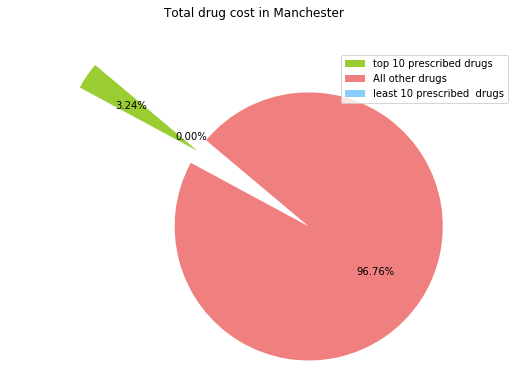

In [448]:
# Data to plot
labels = 'top 10 prescribed drugs', 'All other drugs', 'least 10 prescribed  drugs'
# top 10 drugs expense 
top_10_sum = MedCost_top_10['total actual cost'].sum()
# least 10 drugs expense 
least_10_sum = Med_least_10['total actual cost'].sum()
# other drug expense
other_expense = total_city_expense-top_10_sum-least_10_sum
sizes = [top_10_sum, other_expense, least_10_sum]
colors = [ 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.5, 0.5, 0)  # explode 1st slice
 
# Plot
fig = plt.figure(figsize=(9, 6))
patches, texts, number =plt.pie(sizes, explode=explode, colors=colors, shadow=False, startangle=140, autopct='%1.2f%%')
plt.legend(patches, labels, loc="best") 
fig.suptitle('Total drug cost in Manchester', fontsize=12)
plt.axis('equal')
plt.show()

 ### A2 Description: 
   The pie chart shows that top10 prescribed drugs make up 3.24% of total drug expenditure in Manchester. The toal drug expenditure in Manchester is '17207881.3' pound.  

In [449]:
#Overall actual costs of each practice 
Ans1['total actual cost'].describe()

count       233.000000
mean      73853.567639
std       55414.197673
min          20.810000
25%       32579.690000
50%       64580.190000
75%      105736.910000
max      254105.020000
Name: total actual cost, dtype: float64

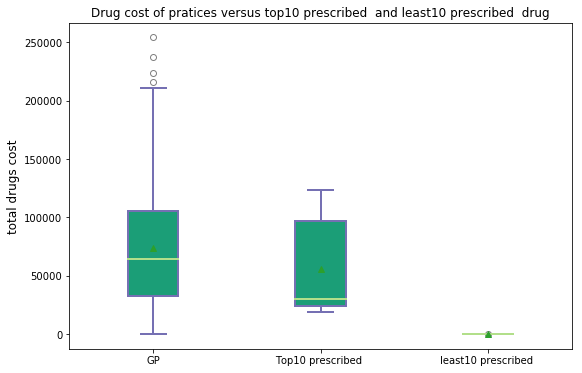

In [450]:
#Overall actual costs of each practice 
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
data=[Ans1['total actual cost'],MedCost_top_10['total actual cost'], Med_least_10['total actual cost']]

bp =ax.boxplot(data, showmeans=True, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## Custom x-axis labels
ax.set_xticklabels(['GP', 'Top10 prescribed ','least10 prescribed '])
ax.set_title('Drug cost of pratices versus top10 prescribed  and least10 prescribed  drug')
ax.set_ylabel("total drugs cost",fontsize=12)

plt.show()


 ### A2 Description: 
    Every GP has different drug expenditure. From the description, we can see that mean of Manchester GP drug expenditure is around 73853. From the boxplot we could see that some top 10 prescribed drugs cost are even more than some GP drug expenditure.
    

### A3.Find the top ten most expencive medications and calculate their total actual cost.

In [451]:
#top ten least expensive drug 
MedCount['cost_per_drug']=MedCount['total actual cost']/MedCount['total number of prescriptions']
MedCount= MedCount.sort_values(by=['cost_per_drug'])
MedCount= MedCount[MedCount['total number of prescriptions']!=0]
MedCount.head(10)

,total number of prescriptions,total actual cost,cost_per_drug
bnf name,,,
Savlon_Disinfectant Liq,500,1.23,0.002460
Galenphol_Linct Paed 2mg/5ml S/F,300,0.74,0.002467
Pholcodine_Oral Soln 2mg/5ml S/F,2425,6.55,0.002701
Tobia Teff_G/F W/F Brown Teff Flour,1000,3.11,0.003110
Dettol_Liq,4000,12.51,0.003128
Innovative Soln_PureG/F W/F WteRiceFlour,1000,3.14,0.003140
Loprofin_P.K.U. Liq Drink (Milk),4000,13.88,0.003470
Peptac_Liq (Aniseed) S/F,493400,1799.18,0.003646
Peptac_Liq (Peppermint) S/F,552400,2014.52,0.003647


In [452]:
#top ten most expensive drug
MedCount.tail(10)


,total number of prescriptions,total actual cost,cost_per_drug
bnf name,,,
Somatropin (Rmc)_Inj 20mg/2.5ml Cart,2,857.36,428.680000
Ins Humulin R_500u/ml 20ml Vl,31,13470.72,434.539355
IryPump S Irrig System Set,1,448.45,448.450000
Somatuline Autogel_Inj 90mg/0.5ml SS Pfs,2,1361.10,680.550000
Sandostatin LAR_Inj 20mg Vl + Dil,3,2217.34,739.113333
Octreotide Acet_Inj 20mg Vl + Dil,1,739.12,739.120000
Lanreotide_Inj 120mg/0.5ml Pfs,1,866.41,866.410000
Octreotide Acet_Inj 30mg Vl + Dil,2,1846.40,923.200000
Sandostatin LAR_Inj 30mg Vl + Dil,5,4616.00,923.200000


### A4.  How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

In [453]:
#Choosing Cambridge from town column 
CamListTown=PracticeData['town'].str.contains('cambridge', case=False)
CamTown=PracticeData[CamListTown]
CamTown.head(10)

,period,practiceCode,practiceName,center,street,town,district,postcode
1535,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH
1536,201512,D81002,HUNTINGDON ROAD SURGERY,HUNTINGDON ROAD SURGERY,1 HUNTINGDON ROAD,CAMBRIDGE,,CB3 0DB
1537,201512,D81003,YORK STREET MEDICAL PRACTICE,YORK STREET MED PRACT.,146-148 YORK STREET,CAMBRIDGE,CAMRIDGESHIRE,CB1 2PY
1539,201512,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS
1542,201512,D81009,SHELFORD MEDICAL PRACTICE,SHELFORD MEDICAL PRACTICE,ASHEN GREEN GRT SHELFORD,CAMBRIDGE,,CB22 5FY
1545,201512,D81012,CORNFORD HOUSE SURGERY,CORNFORD HOUSE SURGERY,364 CHERRY HINTON ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB1 8BA
1546,201512,D81013,TRUMPINGTON STREET MEDICAL PRACTICE,TRUMPINGTON ST.MED.CTR.,56 TRUMPINGTON STREET,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1RG
1549,201512,D81016,ARBURY ROAD SURGERY,ARBURY ROAD SURGERY,114 ARBURY ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB4 2JG
1550,201512,D81017,MILL ROAD SURGERY,279-281 MILL ROAD,,CAMBRIDGE,CAMBRIDGESHIRE,CB1 3DG
1561,201512,D81028,FIRS HOUSE SURGERY,FIRS HOUSE SURGERY,STATION ROAD HISTON,CAMBRIDGE,,CB24 9NP


In [454]:
#Choosing Cambridge from distirct
CamListDistrict=PracticeData['district'].str.contains('cambridge', case=False)
CamDistrict=PracticeData[CamListDistrict]
CamDistrict.head(10)

,period,practiceCode,practiceName,center,street,town,district,postcode
1163,201512,C83026,THE DEEPINGS PRACTICE,THE DEEPINGS PRACTICE,GODSEY LNE MARKET DEEPING,PETERBOROUGH,CAMBRIDGESHIRE,PE6 8DD
1535,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH
1538,201512,D81004,ALCONBURY SURGERY,ALCONBURY SURGERY,SCHOOL LANE ALCONBURY,HUNTINGDON,CAMBRIDGESHIRE,PE28 4EQ
1539,201512,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS
1540,201512,D81007,PARK MEDICAL CENTRE,PARK MEDICAL CENTRE,164 PARK ROAD,PETERBOROUGH,CAMBRIDGESHIRE,PE1 2UF
1541,201512,D81008,NORTH BRINK PRACTICE,NORTH BRINK PRACTICE,7 NORTH BRINK,WISBECH,CAMBRIDGESHIRE,PE13 1JU
1543,201512,D81010,PRIORY FIELDS SURGERY,PRIORY FIELDS SURGERY,NURSERY ROAD,HUNTINGDON,CAMBRIDGESHIRE,PE29 3RL
1544,201512,D81011,CLARKSON SURGERY,CLARKSON SURGERY,DE HAVILLAND ROAD,WISBECH,CAMBRIDGESHIRE,PE13 3AN
1545,201512,D81012,CORNFORD HOUSE SURGERY,CORNFORD HOUSE SURGERY,364 CHERRY HINTON ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB1 8BA
1546,201512,D81013,TRUMPINGTON STREET MEDICAL PRACTICE,TRUMPINGTON ST.MED.CTR.,56 TRUMPINGTON STREET,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1RG


In [455]:
#Joining two group of Cambridge
CambridgeGP=pd.merge(CamDistrict,CamTown,how='outer')
CambridgeGP.head(10) 

,period,practiceCode,practiceName,center,street,town,district,postcode
0,201512,C83026,THE DEEPINGS PRACTICE,THE DEEPINGS PRACTICE,GODSEY LNE MARKET DEEPING,PETERBOROUGH,CAMBRIDGESHIRE,PE6 8DD
1,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH
2,201512,D81004,ALCONBURY SURGERY,ALCONBURY SURGERY,SCHOOL LANE ALCONBURY,HUNTINGDON,CAMBRIDGESHIRE,PE28 4EQ
3,201512,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS
4,201512,D81007,PARK MEDICAL CENTRE,PARK MEDICAL CENTRE,164 PARK ROAD,PETERBOROUGH,CAMBRIDGESHIRE,PE1 2UF
5,201512,D81008,NORTH BRINK PRACTICE,NORTH BRINK PRACTICE,7 NORTH BRINK,WISBECH,CAMBRIDGESHIRE,PE13 1JU
6,201512,D81010,PRIORY FIELDS SURGERY,PRIORY FIELDS SURGERY,NURSERY ROAD,HUNTINGDON,CAMBRIDGESHIRE,PE29 3RL
7,201512,D81011,CLARKSON SURGERY,CLARKSON SURGERY,DE HAVILLAND ROAD,WISBECH,CAMBRIDGESHIRE,PE13 3AN
8,201512,D81012,CORNFORD HOUSE SURGERY,CORNFORD HOUSE SURGERY,364 CHERRY HINTON ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB1 8BA
9,201512,D81013,TRUMPINGTON STREET MEDICAL PRACTICE,TRUMPINGTON ST.MED.CTR.,56 TRUMPINGTON STREET,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1RG


In [456]:
#Merge two datascource. 
CamMain=pd.merge(CambridgeGP, prescribeData, left_on='practiceCode', right_on='practice' )
CamMain.head()

,period_x,practiceCode,practiceName,center,street,town,district,postcode,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period_y,
0,201512,C83026,THE DEEPINGS PRACTICE,THE DEEPINGS PRACTICE,GODSEY LNE MARKET DEEPING,PETERBOROUGH,CAMBRIDGESHIRE,PE6 8DD,Q59,99D,C83026,0101010G0AAABAB,Co-Magaldrox_Susp 195mg/220mg/5ml S/F,1,2.99,2.78,500,201512,
1,201512,C83026,THE DEEPINGS PRACTICE,THE DEEPINGS PRACTICE,GODSEY LNE MARKET DEEPING,PETERBOROUGH,CAMBRIDGESHIRE,PE6 8DD,Q59,99D,C83026,0101010G0BBABAB,Maalox_Susp 195mg/220mg/5ml S/F,2,10.05,9.32,1500,201512,
2,201512,C83026,THE DEEPINGS PRACTICE,THE DEEPINGS PRACTICE,GODSEY LNE MARKET DEEPING,PETERBOROUGH,CAMBRIDGESHIRE,PE6 8DD,Q59,99D,C83026,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,4,7.80,7.25,2000,201512,
3,201512,C83026,THE DEEPINGS PRACTICE,THE DEEPINGS PRACTICE,GODSEY LNE MARKET DEEPING,PETERBOROUGH,CAMBRIDGESHIRE,PE6 8DD,Q59,99D,C83026,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,30,160.25,149.21,15650,201512,
4,201512,C83026,THE DEEPINGS PRACTICE,THE DEEPINGS PRACTICE,GODSEY LNE MARKET DEEPING,PETERBOROUGH,CAMBRIDGESHIRE,PE6 8DD,Q59,99D,C83026,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,6.14,5.69,120,201512,


In [457]:
#Entire Cambridge expense on drug
CamMain['act cost'].sum()

10125299.359999914

In [458]:
#Entire Cambridge total prescribed drug
CamMain['quantity'].sum()

105078592

In [459]:
# Least prescribed drug  in Cambridge 
CamMedCount = CamMain.groupby('bnf name')[['quantity','act cost']].agg({'quantity':'sum','act cost':'sum'}) 
CamMedCount = CamMedCount.rename(index=str, columns={"quantity": "total number of prescriptions", "act cost": "total actual cost"})
CamMedCount = CamMedCount.sort_values(by=['total number of prescriptions'])
CamMedCount_least = CamMedCount.head(10)
CamMedCount_least 

,total number of prescriptions,total actual cost
bnf name,,
Umeclidinium Brom_Inh 65mcg (30D),1,25.44
Sigvaris Advance 2 Med Comp A/Sleeve+H/P,1,25.91
Serevent_Inha 25mcg (120 D),1,27.07
Senset_Skin Cleansing Foam Aero 150ml,1,0.79
Vismed Multi Sod Hyaluronate Eye Dps P/F,1,6.31
Lyxumia_Inj 10mcg/20mcg TtInitiationPack,1,53.59
Ostomart_HiLINE Activ Left Stoma Supp/Be,1,51.29
Ostomart_HiLINE Activ Right Stoma Supp/B,1,51.29
Scanpor 5cm x 5m Surg Adh Tape Perm Non-,1,1.10


In [460]:
# Most prescribed drug in Cambridge
CamMedCount_most=CamMedCount.tail(10).sort_values(by=['total number of prescriptions'],ascending = False)
CamMedCount_most

,total number of prescriptions,total actual cost
bnf name,,
Fortisip Compact_Liq (8 Flav),3241875,48465.28
Paracet_Tab 500mg,3083706,84072.43
Fortisip Bottle_Liq (8 Flav),2477472,23683.97
Lactulose_Soln 3.1g-3.7g/5ml,2277683,13344.15
Omeprazole_Cap E/C 20mg,1730390,67344.93
Metformin HCl_Tab 500mg,1671282,74220.74
Nutrison Pack_Energy M/Fibre,1623184,21642.72
Dermol 500_Lot,1553000,17375.71
Fortijuce_Liq (7 Flav),1450000,13548.25


In [461]:
CamMedCount_most_list = CamMedCount_most.index.str.strip().tolist()
CamMedCount_least_list = CamMedCount_least.index.str.strip().tolist()
ManMedCost_most_list = MedCost_top_10.index.str.strip().tolist()
ManMedCost_least_list = Med_least_10.index.str.strip().tolist()
top_least_drugs=pd.DataFrame({'Cambridge most prescribed drug':CamMedCount_most_list,'Cambridge least prescribed drug':CamMedCount_least_list,'Manchester most prescribed drug':ManMedCost_most_list,'Manchester least prescribed drug':ManMedCost_least_list}, index=[1,2,3,4,5,6,7,8,9,10])
top_least_drugs

,Cambridge least prescribed drug,Cambridge most prescribed drug,Manchester least prescribed drug,Manchester most prescribed drug
1,Umeclidinium Brom_Inh 65mcg (30D),Fortisip Compact_Liq (8 Flav),Ingenol Mebutate_Gel 500mcg/g,Fortisip Bottle_Liq (8 Flav)
2,Sigvaris Advance 2 Med Comp A/Sleeve+H/P,Paracet_Tab 500mg,Picato_Gel 500mcg/g,Ensure Plus_Milkshake Style Liq(10 Flav)
3,Serevent_Inha 25mcg (120 D),Fortisip Bottle_Liq (8 Flav),Kavendor_Comfizz Stoma Shallow Wstbnd Ne,Paracet_Tab 500mg
4,Senset_Skin Cleansing Foam Aero 150ml,Lactulose_Soln 3.1g-3.7g/5ml,Genesis Accord Vacuum Pump Manual,Lactulose_Soln 3.1g-3.7g/5ml
5,Vismed Multi Sod Hyaluronate Eye Dps P/F,Omeprazole_Cap E/C 20mg,Mediven harmony Class 2 Combined A/Sleev,Omeprazole_Cap E/C 20mg
6,Lyxumia_Inj 10mcg/20mcg TtInitiationPack,Metformin HCl_Tab 500mg,Gppe Ins_Humulin I 10ml Vl,Metformin HCl_Tab 500mg
7,Ostomart_HiLINE Activ Left Stoma Supp/Be,Nutrison Pack_Energy M/Fibre,Gppe Ins_Insuman Basal 100u/ml 5ml Vl,Jevity 1.5kcal_Liq
8,Ostomart_HiLINE Activ Right Stoma Supp/B,Dermol 500_Lot,Gyno-Daktarin_Vag Cap 1200mg,Doublebase_Gel
9,Scanpor 5cm x 5m Surg Adh Tape Perm Non-,Fortijuce_Liq (7 Flav),Mediven harmony Class 1 Combined Armslee,Gaviscon Advance_Liq (Aniseed) (Reckitt)
10,Zn Ox 1.25cm x 5m Surg Adh Tape,Diprobase_Crm,Gyno-Pevaryl Once_Vag Pess 150mg,Methadone HCl_Mix 1mg/1ml


In [462]:
 drug_table = pd.DataFrame({'Total expenditure on drug':[10125299,17207881] ,'Total Quantity':[105078592,186578494]}, index=['Cambridge','Manchester'])
 drug_table

,Total Quantity,Total expenditure on drug
Cambridge,105078592,10125299
Manchester,186578494,17207881


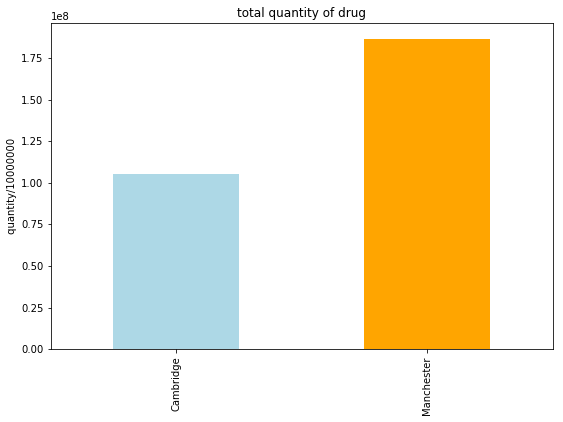

In [547]:
fig = plt.figure(1, figsize=(9, 6), )
ax = fig.add_subplot(111)
drug_table.iloc[:,0].plot(kind='bar', figsize=(9, 6),color=['lightblue','orange']);
ax.set_title('total quantity of drug')
ax.set_ylabel(' quantity/10000000 ')

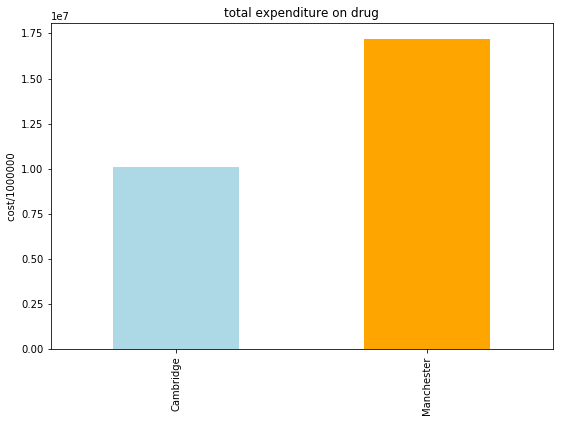

In [548]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
drug_table.iloc[:,1].plot(kind='bar', figsize=(9, 6),color=['lightblue','orange']);
ax.set_title('total expenditure on drug')
ax.set_ylabel(' cost/1000000 ')

 #### A4. Description
 Compare Cambridge and Manchester we can see differnent top 10 and least 10 prescribed drug listed as table above. Cambridge GP total expenditure on drug is about 10125299, however Manchester GP total expenditure on drugs is about 17207881. Manchester GPs spend 7082582 more than Cambridge GPs. Cambrige GP prescribed total 105078592 drugs, on the other hand Manchester GPs prescribed 186578494 drugs. Manchester prescribed 81499902 more drugs than cambridge.     

#### A5.PandaSQL
Pandas dataframes can also be queried using SQL! The code snippet below gives you an example of how to execute an SQL statement using pandasql. Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.

In [465]:
pdsql = PandaSQL()
all_district = pdsql("SELECT district , count(practiceCode) AS GPnumber FROM PracticeData GROUP BY district  ORDER BY count(practiceCode) DESC ", locals())
all_district["district"] = all_district["district"].str.strip()
pdsql("SELECT district , GPnumber FROM all_district WHERE district LIKE '%MANCHESTER%' ")

,district,GPnumber
0,MANCHESTER,87
1,GREATER MANCHESTER,18
2,ATHERTON MANCHESTER,1
3,MIDDLETON MANCHESTER,1
4,NR.MANCHESTER,1
5,WYTHENSHAW MANCHESTER,1


# Assignment B [25 marks]
Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistics:

1. Calculate the monthly total spending for each GP-practice.

2. Use the number of registered patients in each GP-practice to calculate the relative costs per patient.

3. Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot

4. Visualize the relative costs per patient of all national GP-practices in a histogram.

5. Use descriptive statistics to show how your assigned city compares to the national level.

In [466]:
prescribeData.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
0,Q44,RJN,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.59,3.33,21,201512,
1,Q44,RJN,Y05218,0501130R0AAAAAA,Nitrofurantoin_Cap 50mg,1,14.39,13.42,28,201512,
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,1,0.51,0.58,14,201512,
3,Q44,RTV,Y04937,0401020P0AAABAB,Lorazepam_Tab 1mg,1,2.65,2.46,28,201512,
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,2,2.01,2.08,84,201512,


In [467]:
#Monthly total spending for each GP-practice.
MonthTotalSpendGP = prescribeData.groupby('practice')[['act cost']].sum()
MonthTotalSpendGP = MonthTotalSpendGP.rename(index=str, columns={"act cost": "monthly total spending"})
MonthTotalSpendGP

,monthly total spending
practice,
A81001,83220.57
A81002,333514.67
A81003,47977.16
A81004,147494.85
A81005,107669.51
A81006,197436.78
A81007,141780.85
A81008,62463.90
A81009,139612.91


## B2.
Use the number of registered patients in each GP-practice to calculate the relative costs per patient.

In [468]:
#Load GP patients dataset 
GPpatientsNumber=pd.read_csv('https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age.csv')
GPpatientsNumber.columns = map(str.strip, GPpatientsNumber.columns)
GPpatientsNumber.columns = map(str.lower, GPpatientsNumber.columns)
GPpatientsNumber.head()

,gp_practice_code,postcode,ons_ccg_code,ccg_code,ons_region_code,nhse_region_code,ons_comm_rgn_code,nhse_comm_region_code,total_all,total_male,...,female_50-54,female_55-59,female_60-64,female_65-69,female_70-74,female_75-79,female_80-84,female_85-89,female_90-94,female_95+
0,A81001,TS18 1HU,E38000075,00K,E39000027,Q74,E40000001,Y54,4234,2061,...,162,139,112,134,104,120,94,59,19,7
1,A81002,TS18 2AW,E38000075,00K,E39000027,Q74,E40000001,Y54,19691,9706,...,833,733,634,636,483,445,362,231,106,22
2,A81003,TS26 8DB,E38000075,00K,E39000027,Q74,E40000001,Y54,3357,1779,...,113,100,91,94,49,44,38,18,13,2
3,A81004,TS1 3BE,E38000162,00M,E39000027,Q74,E40000001,Y54,9151,4774,...,277,265,261,228,205,210,165,91,39,17
4,A81005,TS14 7DJ,E38000162,00M,E39000027,Q74,E40000001,Y54,7883,3826,...,287,280,309,368,253,183,144,102,47,20


In [469]:
GPpatientsNumberSimple = GPpatientsNumber.loc[:,["gp_practice_code","total_all"]]
GPpatientsNumberSimple.head() 

,gp_practice_code,total_all
0,A81001,4234
1,A81002,19691
2,A81003,3357
3,A81004,9151
4,A81005,7883


In [470]:
#Joining GP expend and patient number 
GPExpense = pd.merge(GPpatientsNumberSimple,MonthTotalSpendGP, left_on='gp_practice_code', right_index=True)
GPExpense.head() 

,gp_practice_code,total_all,monthly total spending
0,A81001,4234,83220.57
1,A81002,19691,333514.67
2,A81003,3357,47977.16
3,A81004,9151,147494.85
4,A81005,7883,107669.51


In [471]:
#costs per patient 
GPExpense['Cost per patient']= GPExpense.iloc[:,2].astype('float')/GPExpense.iloc[:,1].astype('float')
GPExpensesort = GPExpense.sort_values("monthly total spending",ascending=False)
GPExpensesort

,gp_practice_code,total_all,monthly total spending,Cost per patient
5874,M85063,60352,923786.26,15.306639
584,B82005,55378,693208.84,12.517766
4485,J82155,37848,635726.91,16.796843
4812,K83002,48115,592576.17,12.315830
1809,D82044,33126,579644.99,17.498188
1257,C83019,22401,547071.55,24.421747
603,B82026,32973,535822.74,16.250348
5232,L83100,31624,534949.83,16.915945
7423,Y01008,31841,529974.70,16.644411
1352,C84024,30038,522974.59,17.410433


## B3.
Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot

In [472]:
# Eliminate NA
GPExpensesortNA = GPExpensesort.replace([np.inf, -np.inf], np.nan)
GPExpensesortNA = GPExpensesortNA.dropna(axis=0, how='any')

In [473]:
# Sorting Index
GPExpensesortNA.index = range(len(GPExpensesortNA))
GPExpensesortNA.head()

,gp_practice_code,total_all,monthly total spending,Cost per patient
0,M85063,60352,923786.26,15.306639
1,B82005,55378,693208.84,12.517766
2,J82155,37848,635726.91,16.796843
3,K83002,48115,592576.17,12.315830
4,D82044,33126,579644.99,17.498188


In [474]:
#  Reform Datatype
GPExpensesortNA[['Cost per patient','total_all','monthly total spending']].astype(float)
GPExpensesortNA.head()

,gp_practice_code,total_all,monthly total spending,Cost per patient
0,M85063,60352,923786.26,15.306639
1,B82005,55378,693208.84,12.517766
2,J82155,37848,635726.91,16.796843
3,K83002,48115,592576.17,12.315830
4,D82044,33126,579644.99,17.498188


In [475]:
# Choosing MAnchester by isin 
ManGPExpense=GPExpensesortNA[GPExpensesortNA.gp_practice_code.isin(CamMain.practiceCode.unique().astype('str'))]
ManGPExpense.head()

,gp_practice_code,total_all,monthly total spending,Cost per patient
21,D81026,25439,380823.94,14.970083
28,C83026,23322,354806.05,15.213363
72,D81008,19575,301600.16,15.407416
245,D81046,17402,238752.53,13.719833
330,D81014,20473,223197.31,10.902032


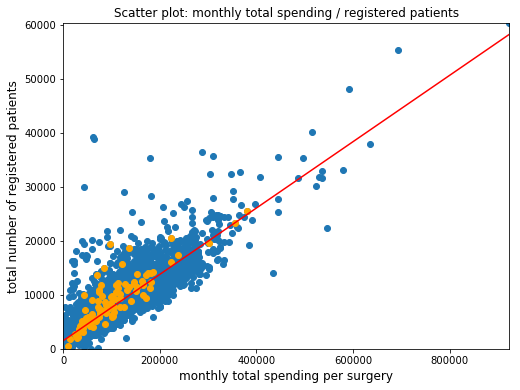

In [476]:
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x=GPExpensesortNA["monthly total spending"]
y=GPExpensesortNA["total_all"]
x1=ManGPExpense['monthly total spending']
y1=ManGPExpense["total_all"]
ax.scatter(x, y) 
ax.scatter(x1,y1,color='orange')
fit = np.polyfit(x,y,deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title('Scatter plot: monthly total spending / registered patients')
ax.set_xlabel("monthly total spending per surgery",fontsize=12)
ax.set_ylabel("total number of registered patients",fontsize=12)
max_x = math.floor(GPExpensesortNA['monthly total spending'].max())
max_y = math.floor(GPExpensesortNA['total_all'].max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)
plt.show()

### B4. Visualize the relative costs per patient of all national GP-practices in a histogram.

In [477]:
GP_sortby_costperpatient = GPExpense.sort_values("Cost per patient",ascending=False)
GP_sortby_costperpatient.head()

,gp_practice_code,total_all,monthly total spending,Cost per patient
2554,E87723,1,58319.78,58319.780000
3549,G82651,1,3358.69,3358.690000
7462,Y01924,112,71547.74,638.819107
7617,Y02873,20,4960.98,248.049000
7468,Y02045,4,626.88,156.720000


In [478]:
#Eliminate outliers 
GP_sortby_cost_95 = GP_sortby_costperpatient[30:-2]
GP_sortby_cost_95.head()

,gp_practice_code,total_all,monthly total spending,Cost per patient
1661,C88626,1599,47237.04,29.541614
6411,N81655,347,10040.82,28.936081
2770,F81670,2993,84544.86,28.247531
2806,F81741,5212,143620.38,27.555714
5278,L83643,1849,50309.15,27.208843


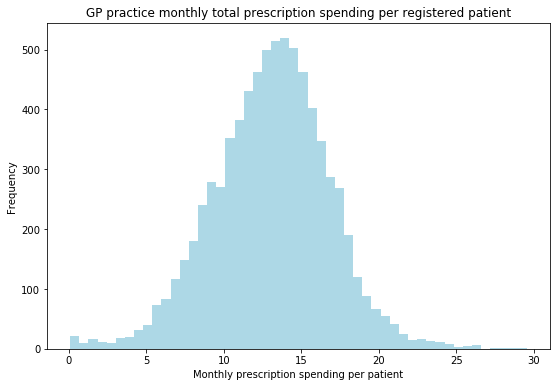

In [552]:
# Draw histogram
roundNA = round(GP_sortby_cost_95['Cost per patient'],2)

x = roundNA
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.hist(x, bins=50, color='lightblue')
ax.set_xlabel("Monthly prescription spending per patient")
ax.set_ylabel("Frequency")
ax.set_title("GP practice monthly total prescription spending per registered patient")
plt.show()

### B5. Use descriptive statistics to show how your assigned city compares to the national level.

In [480]:
ManGPExpense['Cost per patient'].describe()

count    98.000000
mean     11.580714
std       3.190130
min       4.432519
25%       9.310629
50%      11.705865
75%      13.608300
max      20.319295
Name: Cost per patient, dtype: float64

In [481]:
GPExpensesortNA['Cost per patient'].describe()

count     7701.000000
mean        21.317316
std        665.570655
min          0.001872
25%         10.689451
50%         13.212266
75%         15.504289
max      58319.780000
Name: Cost per patient, dtype: float64

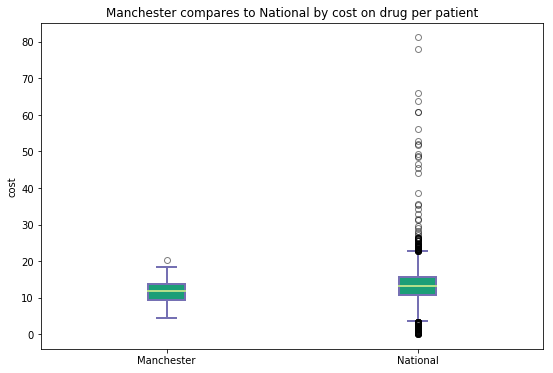

In [482]:
#eliminate outliers in GPExpensesortNA
GPExpensesortNA_sort = GPExpensesortNA['Cost per patient'].sort_values()
GPExpensesortNA_sort = GPExpensesortNA_sort[1:-7]
GPExpensesortNA_sort
#boxplot
expense = [ManGPExpense['Cost per patient'],GPExpensesortNA_sort]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(expense, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## Custom x-axis labels
ax.set_xticklabels(['Manchester', 'National'])
plt.title('Manchester compares to National by cost on drug per patient')
plt.ylabel('cost')
plt.show()


#### B5 Description 
  Manchester per patients spent 11.58 on drugs compares to the whole England which is 21.32 on mean. But when looking at median, Manchester spent 11.7 per patient and nationally spent 13.2 per patient. As the boxplot shown. The above boxplot on national column did eliminate some outliers.   

# Assignment C [25 marks]
Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:


#### C1.Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

In [483]:
prescribeData.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
0,Q44,RJN,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.59,3.33,21,201512,
1,Q44,RJN,Y05218,0501130R0AAAAAA,Nitrofurantoin_Cap 50mg,1,14.39,13.42,28,201512,
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,1,0.51,0.58,14,201512,
3,Q44,RTV,Y04937,0401020P0AAABAB,Lorazepam_Tab 1mg,1,2.65,2.46,28,201512,
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,2,2.01,2.08,84,201512,


In [484]:
GPpatientsNumber.head()

,gp_practice_code,postcode,ons_ccg_code,ccg_code,ons_region_code,nhse_region_code,ons_comm_rgn_code,nhse_comm_region_code,total_all,total_male,...,female_50-54,female_55-59,female_60-64,female_65-69,female_70-74,female_75-79,female_80-84,female_85-89,female_90-94,female_95+
0,A81001,TS18 1HU,E38000075,00K,E39000027,Q74,E40000001,Y54,4234,2061,...,162,139,112,134,104,120,94,59,19,7
1,A81002,TS18 2AW,E38000075,00K,E39000027,Q74,E40000001,Y54,19691,9706,...,833,733,634,636,483,445,362,231,106,22
2,A81003,TS26 8DB,E38000075,00K,E39000027,Q74,E40000001,Y54,3357,1779,...,113,100,91,94,49,44,38,18,13,2
3,A81004,TS1 3BE,E38000162,00M,E39000027,Q74,E40000001,Y54,9151,4774,...,277,265,261,228,205,210,165,91,39,17
4,A81005,TS14 7DJ,E38000162,00M,E39000027,Q74,E40000001,Y54,7883,3826,...,287,280,309,368,253,183,144,102,47,20


In [485]:
#picking statin drugs data
statin_all=prescribeData[prescribeData['bnf name'].str.contains('Simvastatin|Atorvastatin|Rosuvastatin|Pravastatin|Fluvastatin')]
statin_all.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
102,Q44,RXA,Y00327,0212000B0AAACAC,Atorvastatin_Tab 40mg,2,1.67,1.67,29,201512,
103,Q44,RXA,Y00327,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.10,0.20,3,201512,
647,Q44,RY7,N85638,0212000B0AAABAB,Atorvastatin_Tab 20mg,1,0.70,0.76,14,201512,
648,Q44,RY7,N85638,0212000B0AAACAC,Atorvastatin_Tab 40mg,1,0.06,0.17,1,201512,
650,Q44,RY7,N85638,0212000X0AAAAAA,Pravastatin Sod_Tab 10mg,1,0.29,0.38,7,201512,


In [486]:
#groupby practice code 
statin_bypractice = statin_all.groupby('practice')[['act cost']].sum()
#select practice patients number
GPpatients_number = GPpatientsNumber.iloc[0:,[0,8]]
#Merge patients number and statin 
All_GP_statin=pd.merge(statin_bypractice,GPpatients_number,left_index=True, right_on= 'gp_practice_code')
All_GP_statin['statin cost per patients']=All_GP_statin['act cost']/All_GP_statin.total_all
All_GP_statin

,act cost,gp_practice_code,total_all,statin cost per patients
0,1816.80,A81001,4234,0.429098
1,6513.51,A81002,19691,0.330786
2,868.39,A81003,3357,0.258680
3,2134.60,A81004,9151,0.233264
4,1887.11,A81005,7883,0.239390
5,4074.99,A81006,12345,0.330092
6,2245.57,A81007,9744,0.230457
7,1398.07,A81008,4027,0.347174
8,1588.11,A81009,9175,0.173091
9,2945.80,A81011,11435,0.257613


### C2.Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city.

In [487]:
IMD=pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv')
IMD.columns = map(str.strip, IMD.columns)
IMD.columns = map(str.lower, IMD.columns)
IMD.postcode= IMD.postcode.apply(str.strip)
IMD.head()

,postcode,postcode status,lsoa code,lsoa name,index of multiple deprivation rank,index of multiple deprivation decile,income rank,income decile,income score,employment rank,...,barriers to housing and services rank,barriers to housing and services decile,living environment rank,living environment decile,idaci rank,idaci decile,idaci score,idaopi rank,idaopi decile,idaopi score
0,TS18 1HU,Live,E01033477,Stockton-on-Tees 014G E01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.422,817.0,1.0,0.500
1,TS18 2AW,Live,E01012267,Stockton-on-Tees 014F E01012267,551.0,1.0,433.0,1.0,0.434,215.0,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
2,TS26 8DB,Live,E01011999,Hartlepool 007D E01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.481,2268.0,1.0,0.409
3,TS1 3BE,Live,E01012068,Middlesbrough 001A E01012068,1914.0,1.0,3124.0,1.0,0.306,6166.0,...,16397.0,5.0,4060.0,2.0,2212.0,1.0,0.422,948.0,1.0,0.488
4,TS14 7DJ,Live,E01012117,Redcar and Cleveland 018A E01012117,7082.0,3.0,5343.0,2.0,0.252,4058.0,...,31777.0,10.0,19703.0,6.0,6666.0,3.0,0.300,5907.0,2.0,0.299


In [488]:
#Stripping strings and get post code of manchester. 
man_post_code = ManMain.postcode.unique()
man_post_code = man_post_code.tolist()
man_post_code= [x.strip(' ')for x in man_post_code]
man_post_code[0:5]

['M25 1BT', 'M45 8GH', 'BL9 0SN', 'M25 1NL', 'M25 1EX']

In [489]:
#Identify IMD index postcode in Manchester 
b=IMD.postcode.isin(man_post_code)
Manchester_postcode_IMD = IMD[b]
Man_IMD=Manchester_postcode_IMD.iloc[0:,[0,4,5]]
Man_IMD.head()

,postcode,index of multiple deprivation rank,index of multiple deprivation decile
6312,M25 1BT,10068.0,4.0
6313,M45 8GH,12341.0,4.0
6314,BL9 0SN,6424.0,2.0
6316,M26 2SP,3444.0,2.0
6322,BL9 0SN,6424.0,2.0


In [490]:
#strip postcode blank
ManchesterGP.postcode=ManchesterGP.postcode.apply(str.strip)
ManchesterGP.head()

,period,practiceCode,practiceName,center,street,town,district,postcode
0,201512,P83001,FAIRFAX GROUP PRACTICE,PRESTWICH HEALTH CENTRE,FAIRFAX ROAD,PRESTWICH,MANCHESTER,M25 1BT
1,201512,P83004,THE UPLANDS MEDICAL PRACTICE,WHITEFIELD HEALTH CENTRE,BURY NEW ROAD,WHITEFIELD,MANCHESTER,M45 8GH
2,201512,P83005,RIBBLESDALE GP-DR SUBBIAH,TOWNSIDE PCC-KNOWSLEY PL,KNOWSLEY STREET,BURY,GREATER MANCHESTER,BL9 0SN
3,201512,P83015,RIBBLESDALE MEDICAL PRACTICES,TOWNSIDE PCC-KNOWSLEY PL,KNOWSLEY STREET,BURY,GREATER MANCHESTER,BL9 0SN
4,201512,P83021,PEEL GPS DR JACKSON,TOWNSIDE PCC-KNOWSLEY PL,KNOWSLEY STREET,BURY,GREATER MANCHESTER,BL9 0SN


In [491]:
# pick the right MAN postcode from pratice 
ManchesterGP_light=ManchesterGP.iloc[0:,[1,2,7]]
ManchesterGP_light.head()

,practiceCode,practiceName,postcode
0,P83001,FAIRFAX GROUP PRACTICE,M25 1BT
1,P83004,THE UPLANDS MEDICAL PRACTICE,M45 8GH
2,P83005,RIBBLESDALE GP-DR SUBBIAH,BL9 0SN
3,P83015,RIBBLESDALE MEDICAL PRACTICES,BL9 0SN
4,P83021,PEEL GPS DR JACKSON,BL9 0SN


In [492]:
# Merge IMD with GP practice 
Man_IMD_GP = pd.merge(ManchesterGP_light,Man_IMD, left_on='postcode', right_on='postcode')
Man_IMD_GP = Man_IMD_GP.drop_duplicates()
Man_IMD_GP

,practiceCode,practiceName,postcode,index of multiple deprivation rank,index of multiple deprivation decile
0,P83001,FAIRFAX GROUP PRACTICE,M25 1BT,10068.0,4.0
2,P83004,THE UPLANDS MEDICAL PRACTICE,M45 8GH,12341.0,4.0
3,P83005,RIBBLESDALE GP-DR SUBBIAH,BL9 0SN,6424.0,2.0
10,P83015,RIBBLESDALE MEDICAL PRACTICES,BL9 0SN,6424.0,2.0
17,P83021,PEEL GPS DR JACKSON,BL9 0SN,6424.0,2.0
24,P83026,PEEL GPS - DR PALANIAPPAN,BL9 0SN,6424.0,2.0
31,P83030,PEEL GPS DR CHACKO,BL9 0SN,6424.0,2.0
38,P83027,GREYLAND MEDICAL CENTRE,M25 1NL,6419.0,2.0
39,P83605,WHITTAKER LANE MED CENTRE,M25 1EX,7017.0,3.0
40,P83609,THE BIRCHES MEDICAL CENTRE,M25 2GN,18948.0,6.0


### C3.
Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer. 

In [493]:
#statin usage dataset
statin_all.head()

,sha,pct,practice,bnf code,bnf name,items,nic,act cost,quantity,period,
102,Q44,RXA,Y00327,0212000B0AAACAC,Atorvastatin_Tab 40mg,2,1.67,1.67,29,201512,
103,Q44,RXA,Y00327,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.10,0.20,3,201512,
647,Q44,RY7,N85638,0212000B0AAABAB,Atorvastatin_Tab 20mg,1,0.70,0.76,14,201512,
648,Q44,RY7,N85638,0212000B0AAACAC,Atorvastatin_Tab 40mg,1,0.06,0.17,1,201512,
650,Q44,RY7,N85638,0212000X0AAAAAA,Pravastatin Sod_Tab 10mg,1,0.29,0.38,7,201512,


In [494]:
All_GP_statin = All_GP_statin.sort_values(by="act cost")
All_GP_statin.head()

,act cost,gp_practice_code,total_all,statin cost per patients
1479,0.89,C84720,42,0.021190
212,0.89,A83068,164,0.005427
7641,1.06,Y02988,325,0.003262
3374,1.30,G81703,16,0.081250
3549,2.06,G82651,1,2.060000


In [495]:
Practice_postcode=PracticeData.iloc[:,[1,7]]
Practice_postcode.loc[:,"postcode"]=Practice_postcode.loc[:,"postcode"].apply(str.strip)
All_GP_statin_postcode= pd.merge(All_GP_statin,Practice_postcode,left_on='gp_practice_code' ,right_on='practiceCode' )
All_GP_statin_postcode=All_GP_statin_postcode.drop_duplicates()
All_GP_statin_postcode.head()

/Users/richardtsai/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,act cost,gp_practice_code,total_all,statin cost per patients,practiceCode,postcode
0,0.89,C84720,42,0.021190,C84720,NG7 2GW
1,0.89,A83068,164,0.005427,A83068,SR8 4PF
2,1.06,Y02988,325,0.003262,Y02988,B44 0PU
3,1.30,G81703,16,0.081250,G81703,TN34 1BA
4,2.06,G82651,1,2.060000,G82651,TN3 9PY


In [496]:
# first decile group 
first_decile=All_GP_statin_postcode[All_GP_statin_postcode['act cost'] <= All_GP_statin_postcode['act cost'].quantile([0.1]).tolist()]
first_decile.head()

,act cost,gp_practice_code,total_all,statin cost per patients,practiceCode,postcode
0,0.89,C84720,42,0.021190,C84720,NG7 2GW
1,0.89,A83068,164,0.005427,A83068,SR8 4PF
2,1.06,Y02988,325,0.003262,Y02988,B44 0PU
3,1.30,G81703,16,0.081250,G81703,TN34 1BA
4,2.06,G82651,1,2.060000,G82651,TN3 9PY


In [497]:
# last decile group
last_decile=All_GP_statin_postcode[All_GP_statin_postcode['act cost'] >= All_GP_statin_postcode['act cost'].quantile([0.9]).tolist()]
last_decile.tail()

,act cost,gp_practice_code,total_all,statin cost per patients,practiceCode,postcode
7672,10031.64,D82044,33126,0.302833,D82044,PE31 6GZ
7673,10377.88,L83100,31624,0.328165,L83100,PL7 1AD
7674,10691.95,M89003,40204,0.265942,M89003,B90 4DD
7675,11679.92,C83019,22401,0.521402,C83019,PE25 2RN
7676,16313.95,M85063,60352,0.270313,M85063,B24 0SY


In [498]:
# IMD dataframe
all_IMD=IMD.iloc[:,[0,4]]
all_IMD.iloc[:,0] = all_IMD.iloc[:,0].apply(str.strip)
all_IMD.head()

/Users/richardtsai/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,postcode,index of multiple deprivation rank
0,TS18 1HU,73.0
1,TS18 2AW,551.0
2,TS26 8DB,967.0
3,TS1 3BE,1914.0
4,TS14 7DJ,7082.0


In [499]:
# first percentile merge with Index of Multiple Deprivation
first_percentile_IMD=pd.merge(all_IMD,first_decile,left_on='postcode', right_on='postcode')
first_percentile_IMD=first_percentile_IMD.drop_duplicates()
first_percentile_IMD.head()

,postcode,index of multiple deprivation rank,act cost,gp_practice_code,total_all,statin cost per patients,practiceCode
0,TS18 1HU,73.0,31.51,A81632,664,0.047455,A81632
4,TS18 2AT,551.0,368.26,A81609,1363,0.270183,A81609
6,TS6 6TD,664.0,205.73,Y02499,1587,0.129635,Y02499
10,TS10 4NW,416.0,352.17,A81069,1389,0.253542,A81069
17,TS3 9NB,376.0,177.98,A81621,2245,0.079278,A81621


In [500]:
#last percentile merge with Index of Multiple Deprivation
last_percentile_IMD = pd.merge(all_IMD,last_decile,left_on='postcode', right_on='postcode')
last_percentile_IMD = last_percentile_IMD.drop_duplicates()
last_percentile_IMD.tail()

,postcode,index of multiple deprivation rank,act cost,gp_practice_code,total_all,statin cost per patients,practiceCode
987,IP3 9QJ,12159.0,3471.98,Y01794,15332,0.226453,Y01794
988,TR26 1RU,10379.0,3723.24,Y01922,12431,0.299513,Y01922
989,SW17 0RT,9962.0,4296.31,Y02423,36448,0.117875,Y02423
990,B33 8TA,2077.0,3241.65,Y02893,13867,0.233767,Y02893
991,PL25 3EF,11785.0,7022.07,Y04957,31642,0.221922,Y04957


In [501]:
last_percentile_IMD.iloc[:,1].describe()

count      768.000000
mean     15856.899740
std       9263.586417
min         81.000000
25%       8453.250000
50%      15363.000000
75%      23731.250000
max      32796.000000
Name: index of multiple deprivation rank, dtype: float64

In [502]:
first_percentile_IMD.iloc[:,1].describe()

count      767.000000
mean     11031.169492
std       8755.328066
min         27.000000
25%       3735.000000
50%       8764.000000
75%      17416.000000
max      32327.000000
Name: index of multiple deprivation rank, dtype: float64

#### C3 description 
 The GP that spends more statin prescription has higher IMD ranking which means in a least deprived area. The mean IMD ranking of last decile group is 15857 compare to first decile's 11031. 

### C4.
Identify for all GP-practices the associated nine English regions.
Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [503]:
#Load 75 mortality rate 
GP75=pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv')
GP75.columns = map(str.strip, GP75.columns)
GP75.columns = map(str.lower, GP75.columns)
#GP75[GP75.year==2015]
GPAllArea= GP75[(GP75.gender=="Person") & (GP75.year==2015)]
GPNine=GPAllArea.iloc[1:10,:]
GPNine.loc[:,'numerator']=GPNine.loc[:,'numerator'].str.replace(',',"").astype('float')
GPNine.loc[:,'denominator']=GPNine.loc[:,'denominator'].str.replace(',',"").astype('float')
GPNine['mortality_rate']=GPNine.numerator/GPNine.denominator
GPNine

/Users/richardtsai/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/richardtsai/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,year,period of coverage,breakdown,level,level description,gender,age,indicator value,lower ci,upper ci,numerator,denominator,mortality_rate
471,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,3171.0,4289500.0,0.000739
472,2015,1/1/2015 to 31/12/2015,Region,E12000006,East of England,Person,All,66.3,64.1,68.5,3505.0,5541600.0,0.000632
473,2015,1/1/2015 to 31/12/2015,Region,E12000007,London,Person,All,76.7,74.3,79.1,4037.0,8208700.0,0.000492
474,2015,1/1/2015 to 31/12/2015,Region,E12000001,North East,Person,All,86,82.3,89.9,2000.0,2399000.0,0.000834
475,2015,1/1/2015 to 31/12/2015,Region,E12000002,North West,Person,All,88.3,86,90.7,5413.0,6590500.0,0.000821
476,2015,1/1/2015 to 31/12/2015,Region,E12000008,South East,Person,All,60.8,59,62.5,4669.0,8171900.0,0.000571
477,2015,1/1/2015 to 31/12/2015,Region,E12000009,South West,Person,All,64.5,62.3,66.7,3316.0,4934700.0,0.000672
478,2015,1/1/2015 to 31/12/2015,Region,E12000005,West Midlands,Person,All,77.9,75.4,80.4,3780.0,5274400.0,0.000717
479,2015,1/1/2015 to 31/12/2015,Region,E12000003,Yorkshire and The Humber,Person,All,82.8,80.2,85.5,3773.0,4950200.0,0.000762


### C4. Description 
 Above table showed each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [504]:
postcodes_CSV=pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv')
postcodes_CSV.columns = map(str.strip, postcodes_CSV.columns)
postcodes_CSV.columns = map(str.lower, postcodes_CSV.columns)
postcodes_select = postcodes_CSV.loc[:,["postcode 1","region name"]]
postcodes_select.head()

,postcode 1,region name
0,S20 6RU,Yorkshire and The Humber
1,TW4 7BD,London
2,GU513ZQ,South East
3,OX4 6BE,South East
4,TA7 9JH,South West


In [505]:
postcodes_select.iloc[:,0]=postcodes_select.iloc[:,0].str.replace(" ","")

In [506]:
All_GP_statin_postcode.head()

,act cost,gp_practice_code,total_all,statin cost per patients,practiceCode,postcode
0,0.89,C84720,42,0.021190,C84720,NG7 2GW
1,0.89,A83068,164,0.005427,A83068,SR8 4PF
2,1.06,Y02988,325,0.003262,Y02988,B44 0PU
3,1.30,G81703,16,0.081250,G81703,TN34 1BA
4,2.06,G82651,1,2.060000,G82651,TN3 9PY


In [507]:
All_GP_statin_postcode.iloc[:,5]=All_GP_statin_postcode.iloc[:,5].str.replace(" ","")

In [521]:
region_statin=pd.merge(All_GP_statin_postcode,postcodes_select, left_on = 'postcode', right_on= 'postcode 1')
region_statin.head()

,act cost,gp_practice_code,total_all,statin cost per patients,practiceCode,postcode,postcode 1,region name
0,0.89,C84720,42,0.021190,C84720,NG72GW,NG72GW,East Midlands
1,0.89,A83068,164,0.005427,A83068,SR84PF,SR84PF,North East
2,1.06,Y02988,325,0.003262,Y02988,B440PU,B440PU,West Midlands
3,1.30,G81703,16,0.081250,G81703,TN341BA,TN341BA,South East
4,428.96,Y03051,3384,0.126761,Y03051,TN341BA,TN341BA,South East


In [509]:
practice_region= region_statin.iloc[:,[1,7]]
practice_region

,gp_practice_code,region name
0,C84720,East Midlands
1,A83068,North East
2,Y02988,West Midlands
3,G81703,South East
4,Y03051,South East
5,G81013,South East
6,G81658,South East
7,G82651,South East
8,P91605,North West
9,P91007,North West


 ### C4. Description  
  above table show every GP with region.  

### C5.Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases.

In [510]:
region_statin_group=region_statin.groupby('region name')[['act cost']].sum()
region_statin_group

,act cost
region name,
East Midlands,1046465.23
East of England,1307315.80
London,1583620.25
North East,707105.80
North West,1860572.70
South East,2027032.00
South West,1332687.02
West Midlands,1404074.57
Yorkshire and The Humber,1439150.35


In [511]:
GPNine_simply = GPNine.iloc[:,[4,12]]
GPNine_simply

,level description,mortality_rate
471,East Midlands,0.000739
472,East of England,0.000632
473,London,0.000492
474,North East,0.000834
475,North West,0.000821
476,South East,0.000571
477,South West,0.000672
478,West Midlands,0.000717
479,Yorkshire and The Humber,0.000762


In [512]:
ans3=pd.merge(region_statin_group, GPNine_simply, left_index=True , right_on='level description')
ans3=ans3.sort_values(by=['act cost'])
ans3

,act cost,level description,mortality_rate
474,707105.80,North East,0.000834
471,1046465.23,East Midlands,0.000739
472,1307315.80,East of England,0.000632
477,1332687.02,South West,0.000672
478,1404074.57,West Midlands,0.000717
479,1439150.35,Yorkshire and The Humber,0.000762
473,1583620.25,London,0.000492
475,1860572.70,North West,0.000821
476,2027032.00,South East,0.000571


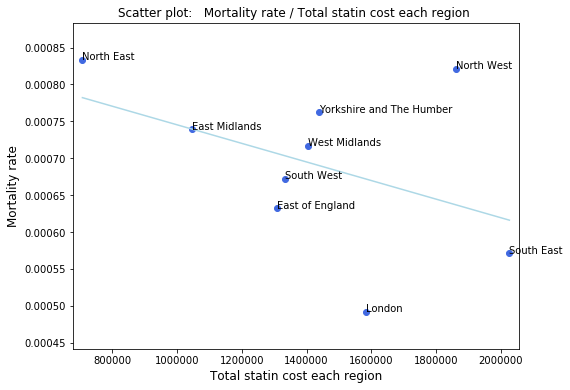

In [551]:
import matplotlib.pyplot as plt
fig3=plt.figure(figsize=(8, 6))
ax3=fig3.add_subplot(111)
x3 = np.array(ans3['act cost'])
y3 = np.array(ans3['mortality_rate'])
fit3 = np.polyfit(x3, y3, deg=1)
ax3.plot(x3, fit3[0] * x3 + fit3[1], color='lightblue')
ax3.scatter(x3, y3, color='royalblue')
ax3.set_title('Scatter plot:   Mortality rate / Total statin cost each region ')
ax3.set_xlabel('Total statin cost each region' ,fontsize=12)
ax3.set_ylabel('Mortality rate',fontsize=12)
ax3.set_xlim(ans3['act cost'].min()-30000, ans3['act cost'].max()+30000)
ax3.set_ylim(ans3['mortality_rate'].min()-0.00005, ans3['mortality_rate'].max()+0.00005)

label3= ans3['level description'].tolist()
for i, txt in enumerate(label3):
    ax3.annotate(txt, (x3[i],y3[i]))

plt.show()

# Assignment D [25 marks]
Using the Google FluTrends surveillance data, pick two random countries, one in the Northern hemisphere and one in the Southern hemisphere. For each of country:

1.Provide a visualisation of the seasonal patterns across all years.

2.Calculate the yearly minimum and maximum for each country. Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

In [ ]:
# look at data set 
japan_data=pd.read_csv('https://www.google.org/flutrends/about/data/flu/jp/data.txt', sep=",", skiprows=11)
japan_data['Date'] = pd.to_datetime(japan_data['Date'])
japan_data.info()

In [539]:
japan_data.head()

,Date,Japan
0,2003-10-26,9
1,2003-11-02,14
2,2003-11-09,17
3,2003-11-16,22
4,2003-11-23,25


In [6]:
arg_data=pd.read_csv('https://www.google.org/flutrends/about/data/flu/ar/data.txt',sep=',',skiprows=11)
arg_data['Date'] = pd.to_datetime(arg_data['Date'])
arg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
Date               654 non-null datetime64[ns]
Argentina          654 non-null int64
Buenos Aires       646 non-null float64
Capital federal    649 non-null float64
Mendoza            541 non-null float64
Santa Fe           540 non-null float64
Cordoba            643 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 35.8 KB


In [7]:
arg_data.head()

,Date,Argentina,Buenos Aires,Capital federal,Mendoza,Santa Fe,Cordoba
0,2003-02-02,136,NaN,NaN,NaN,NaN,NaN
1,2003-02-09,145,NaN,NaN,NaN,NaN,NaN
2,2003-02-16,141,NaN,NaN,NaN,NaN,NaN
3,2003-02-23,135,NaN,NaN,NaN,NaN,NaN
4,2003-03-02,134,NaN,NaN,NaN,NaN,NaN


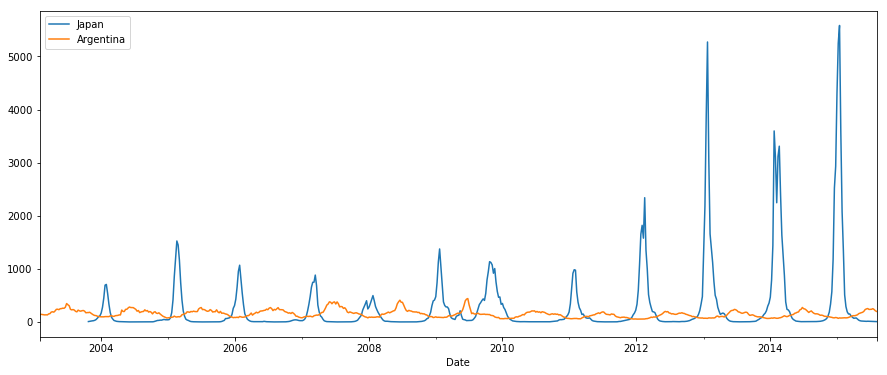

In [8]:
%matplotlib inline
ax4 = japan_data.plot(legend ='left', x='Date', y = 'Japan', figsize=(15, 6), grid=True)
arg_data.plot(x='Date', y = 'Argentina' , ax=ax4)

#### 2.Calculate the yearly minimum and maximum for each country. Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

In [42]:
japan_data_max_min = japan_data.groupby(japan_data.Date.dt.year)[['Japan']].agg(['max','min'])
japan_data_max_min['gap']=japan_data_max_min.iloc[:,0]-japan_data_max_min.iloc[:,1]
japan_data_max_min['amplitute']=japan_data_max_min.iloc[:,2]/2
japan_data_max_min['y_axis']=japan_data_max_min.iloc[:,1]+japan_data_max_min.iloc[:,3]
japan_data_max_min
#Japan_exact_max_time= pd.merge(japan_data_max, japan_data, on="Japan")
#Japan_exact_max_time


Japan       gap amplitute  y_axis
       max min                        
Date                                  
2003   118   9   109      54.5    63.5
2004   708   1   707     353.5   354.5
2005  1526   1  1525     762.5   763.5
2006  1070   1  1069     534.5   535.5
2007   884   2   882     441.0   443.0
2008   498   1   497     248.5   249.5
2009  1376  27  1349     674.5   701.5
2010   350   3   347     173.5   176.5
2011   985   3   982     491.0   494.0
2012  2341   5  2336    1168.0  1173.0
2013  5273   3  5270    2635.0  2638.0
2014  3598   5  3593    1796.5  1801.5
2015  5584   8  5576    2788.0  2796.0

In [108]:
height_y = japan_data_max_min.iloc[:,4].tolist()
height_x = japan_data_max_min.index.tolist()

In [109]:
estimate_height = np.polyfit(height_x,height_y,deg=1)
estimate_height

array([  1.81700549e+02,  -3.64098712e+05])

In [112]:
amp_y = japan_data_max_min.iloc[:,3].tolist()
estimate_amp = np.polyfit(height_x,amp_y,deg=1)
estimate_amp

array([  1.81491758e+02,  -3.63684558e+05])

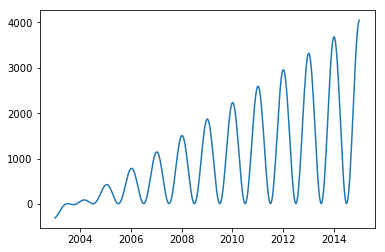

In [124]:
xi = np.linspace(2003,2015,num=400)
yi = (estimate_amp[0]*xi+estimate_amp[1])*np.cos(2*np.pi*xi)+(estimate_height[0]*xi+estimate_height[1])
%matplotlib inline
plt.plot(xi, yi)

In [105]:
arg_data_max_min = arg_data.groupby(arg_data.Date.dt.year)[['Argentina']].agg(['max','min'])
arg_data_max_min['gap']=arg_data_max_min.iloc[:,0]-arg_data_max_min.iloc[:,1]
arg_data_max_min['amplitute']=arg_data_max_min.iloc[:,2]/2
arg_data_max_min['y_axis']=arg_data_max_min.iloc[:,1]+arg_data_max_min.iloc[:,3]
arg_data_max_min

Argentina       gap amplitute y_axis
           max  min                      
Date                                     
2003       348  100  248     124.0  224.0
2004       283   77  206     103.0  180.0
2005       273   78  195      97.5  175.5
2006       272   80  192      96.0  176.0
2007       380   78  302     151.0  229.0
2008       411   84  327     163.5  247.5
2009       442   63  379     189.5  252.5
2010       211   62  149      74.5  136.5
2011       190   56  134      67.0  123.0
2012       200   54  146      73.0  127.0
2013       238   67  171      85.5  152.5
2014       274   70  204     102.0  172.0
2015       254   69  185      92.5  161.5

In [111]:
height_y_arg = arg_data_max_min.iloc[:,4].tolist()
height_x_arg = arg_data_max_min.index.tolist()
estimate_height_arg = np.polyfit(height_x_arg,height_y_arg,deg=1)
estimate_height_arg

array([ -5.36813187e+00,   1.09658846e+04])

In [113]:
amp_y_arg = arg_data_max_min.iloc[:,3].tolist()
estimate_amp_arg = np.polyfit(height_x,amp_y_arg,deg=1)
estimate_amp_arg

array([ -3.12087912e+00,   6.37900000e+03])

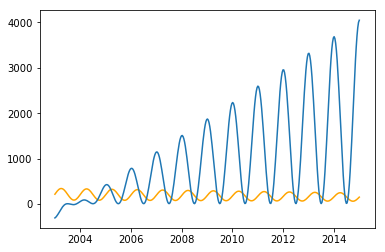

In [125]:
xi_arg = np.linspace(2003,2015,num=400)
yi_arg = (estimate_amp_arg[0]*xi_arg+estimate_amp_arg[1])*np.sin(2*np.pi*xi_arg)+(estimate_height_arg[0]*xi_arg+estimate_height_arg[1])
plt.plot(xi_arg, yi_arg,color='orange')
plt.plot(xi, yi)
plt.title('estimated ')